Сегодня мы будем анализировать данные о зарплатах различных людей в зависимости от их красоты и других факторов.

скачать их можно тут: https://www.kaggle.com/aungpyaeap/beauty/

после скачивания положите их в папку с тетрадкой

In [16]:
import pandas as pd

data = pd.read_csv('beauty.csv')

In [17]:
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

В данных есть следующие признаки:

* wage - зарплата
* exper - сколько лет опыта работы
* union - состоит ли в профсоюзе
* goodhlth - всё ли у работника хорошо со здоровьем
* black - чернокожий ли работник
* female - 1, если женщина, 0 иначе
* married - состоит ли в браке
* service - 1, если работает в сфере услуг
* educ - сколько лет образования
* looks - насколько хорошо выглядит

### Задача 1
Постройте точечные графики зависимости зарплаты от всех остальных признаков.

Поясните в текстовой клетке, какие признаки по вашему мнению влияют на зарплату?

Постройте гистограмму зарплат.

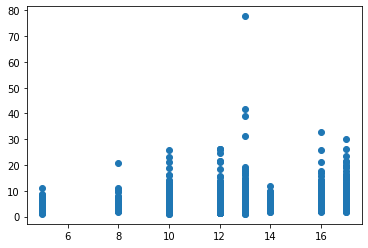

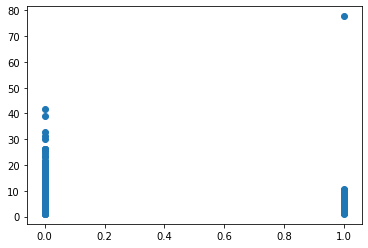

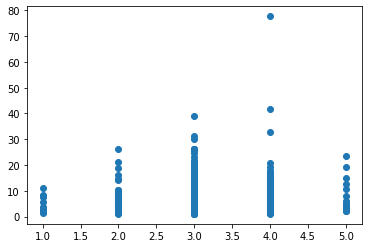

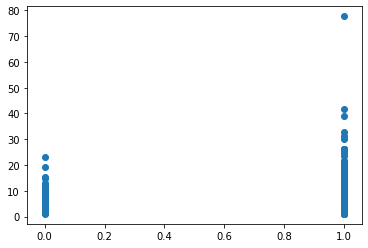

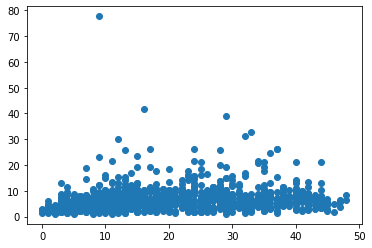

In [57]:
plt.scatter(data.educ, data.wage)
plt.show()
plt.scatter(data.black, data.wage)
plt.show()
plt.scatter(data.looks, data.wage)
plt.show()
plt.scatter(data.married, data.wage)
plt.show()
plt.scatter(data.exper, data.wage)
plt.show()

educ; black;

(array([1.036e+03, 1.880e+02, 2.300e+01, 9.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.02,  8.69, 16.36, 24.03, 31.7 , 39.37, 47.04, 54.71, 62.38,
        70.05, 77.72]),
 <a list of 10 Patch objects>)

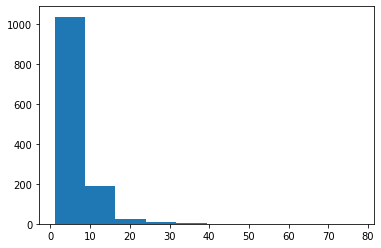

In [51]:
# histogram
plt.hist(data['wage'])

### Задача 2

У кого больше средняя зарплата: у черных женщин или у белых мужчин?

In [27]:
black = data[data.black == 1]
white = data[data.black == 0]

print(black[data.female == 1].wage.mean())
print(white[data.female == 0].wage.mean())

5.4958
7.491434058898847


<ipython-input-27-0858afade929>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(black[data.female == 1].wage.mean())
<ipython-input-27-0858afade929>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(white[data.female == 0].wage.mean())


У белых мужчин больше

### Задача 3

У кого минимальная зарплата? У кого максимальная? Выведите их признаки на экран

In [35]:
data[data.wage == data.wage.max()]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4


In [34]:
data[data.wage == data.wage.min()]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1214,1.02,11,0,1,0,1,1,1,13,3


### Задача 4

Кто получает больше: умные или красивые? (Придумайте сами, как это формализовать и опишите результат).

In [101]:
mean = data.looks.mean()
mean2 = data.educ.mean()
std = data.looks.std()
std2 = data.educ.std()

beautiful = data [((data.looks - mean) / std > (data.educ - mean2) / std2)]
clever = data [((data.looks - mean) / std <= (data.educ - mean2) / std2)]

print(clever.wage.mean())
print(beautiful.wage.mean())

# Ну у умных в среднем заработок выше

6.7021392405063285
5.6419999999999995


### Задача 5

Постройте линейную регрессию, предсказывающую красоту человека по остальным признакам. 

Вспомните, зачем нужно шаклировать признаки?

In [36]:
from sklearn.linear_model import LinearRegression

In [67]:
features = ['wage', 'exper', 'educ', 'female', 'married']
target = 'looks'

In [106]:
X, Y = [], []
for index, row in data.iterrows():
    ans = []
    for f in features:
        ans.append(row[f])
    X.append(ans)
    Y.append(row[target])

In [111]:
# normalize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
# scaled_data

In [104]:
# normalize
from math import sqrt

for i in range(len(X[0])):
    mean = sum([s[i] for s in X]) / len(X)
    
    summ = [(elem[i] - mean) ** 2 for elem in X]
    std = sqrt(sum(summ) / (len(X) - 1))
    
    for j in range(len(X)):
        X[j][i] = (X[j][i] - mean) / std

In [112]:
model = LinearRegression()
model.fit(X, Y)

model.predict([[77, 9, 13, 1, 1]])

array([3.96475585])


# Задача 6
Интерпретируйте коэфициенты линейной регрессии: по каким признакам можно угадать, красивый ли человек?


In [116]:
k = model.coef_
b = model.intercept_

for value, name in sorted(zip(model.coef_, features)):
    print(f'{name} - {value}')

married - -0.057332178035213455
female - -0.014346452929379281
exper - -0.008198223604189996
wage - 0.010157015571825712
educ - 0.028900054297777106


# Задача 7
проделайте предыдущие два пункта для зарплаты

In [80]:
features2 = ['exper', 'educ', 'female', 'married', 'looks']
target2 = 'wage'

X2, Y2 = [], []
for index, row in data.iterrows():
    ans = []
    for f in features2:
        ans.append(row[f])
    X2.append(ans)
    Y2.append(row[target2])
    
print(X2[0], Y2[0])

[30.0, 14.0, 1.0, 1.0, 4.0] 5.73


In [89]:
model2 = LinearRegression()
model2.fit(X2, Y2)

model2.predict([[30.0, 14.0, 1.0, 1.0, 4.0]])

array([6.901482])